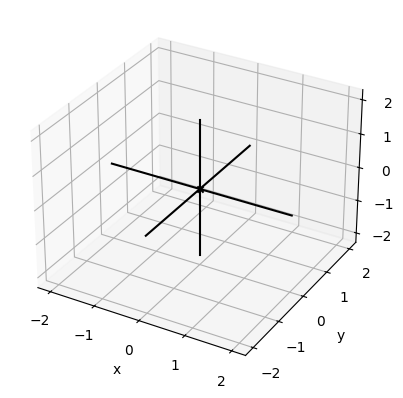

In [1]:
from draw3d import *

draw3d()

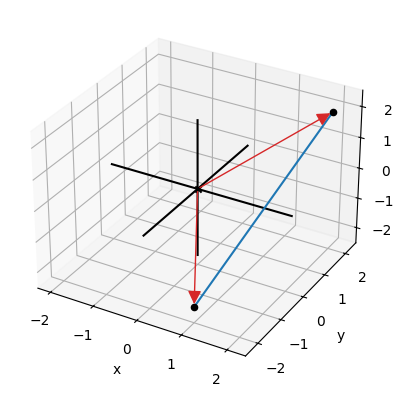

In [2]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2))
)

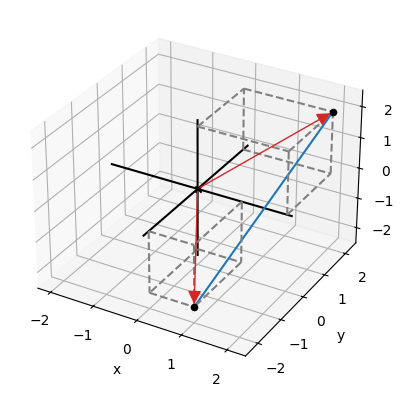

In [3]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2),
)

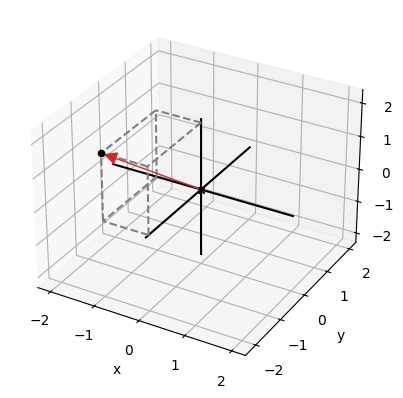

In [4]:
v = (-1, -2, 2)
draw3d(
    Points3D(v),
    Arrow3D(v),
    Box3D(*v)
)

## 3.2 三维空间中的向量运算

三维向量的长度 角度 和 方向


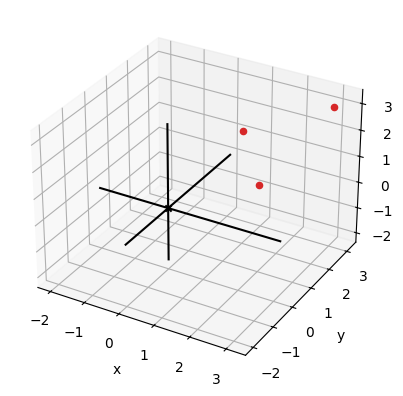

In [5]:
import numpy as np

point1 = (2, 1, 1)
point2 = (1, 2, 2)

point3 = np.add(point1, point2)

draw3d(
    Points3D(point1, point2, point3, color=red)
)

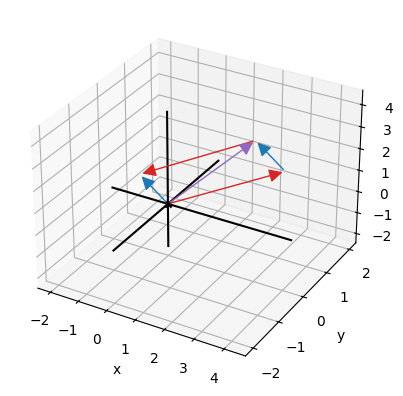

In [6]:
draw3d(
    Arrow3D((4, 0, 3), color=red),
    Arrow3D((-1, 0, 1), color=blue),
    Arrow3D((3, 0, 4), (4, 0, 3), color=blue),
    Arrow3D((-1, 0, 1), (3, 0, 4), color=red),
    Arrow3D((3, 0, 4), color=purple)
)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


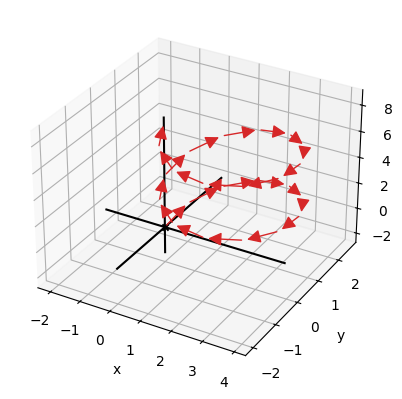

In [7]:
from math import sin, cos, pi

vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]


def add_3d(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)


running_sum = (0, 0, 0)  #<1>
arrows = []
for v in vs:
    next_sum = add_3d(running_sum, v)  #2
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

## 3.3 向量的点积

向量的点积 和 向量的叉积

两个向量垂直则点积为0



11


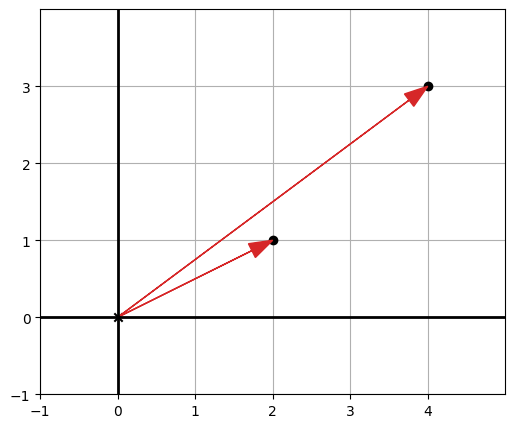

In [8]:
from draw2d import *

point1 = (2, 1)
point2 = (4, 3)

print(np.dot(point1, point2))

draw2d(Points2D(point1, point2), Arrow2D(point1), Arrow2D(point2))

### 3.3.4 用点积测量角度

两个向量的长度和向量之间的夹角的余弦


In [9]:
from math import cos, pi, acos

3 * 2 * cos(75 * pi / 180)

1.5529142706151244

In [10]:
def length(vec):
    return sqrt(sum([coord ** 2 for coord in vec]))


def angle_between(v1, v2):
    _tmp = np.dot(v1, v2) / (length(v1) * length(v2))
    return acos(_tmp)


p1 = (3,4)
p2 = (4,3)

angle_between(p1, p2)

0.283794109208328

## 3.4 向量叉积 cross product

In [11]:
p3 = (1, 0, 0)
p4 = (0, 1, 0)

np.cross(p3, p4)

array([0, 0, 1])

In [12]:
p5 = (1, 0, 0) 
p6 = (2, 0, 0)

np.cross(p5, p6)

array([0, 0, 0])

## 3.5 在二维平面上渲染三维对象

- 向量如何定义三维对象
- 先确定向量围成的面是否是可见的。
- 三维到二维的转换
- 确定面的朝向和阴影

给定一个垂直于每个面的向量和一个指向光源的向量，它们的点积就说明了其对齐程度

In [13]:
# 八个三角形面。
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [14]:
# 获取顶点
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

# 提取三维向量在给定方向上的分量
def component(v,direction):
    return (np.dot(v,direction) / length(direction))

def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

def unit(vec):
    return scale(1.0/length(vec), vec)

def normal(face):
    return(np.cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

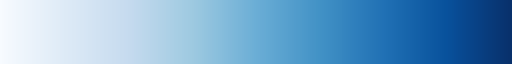

In [15]:
# import matplotlib

# blues = matplotlib.cm.get_cmap('Blues')

plt.get_cmap('Blues')

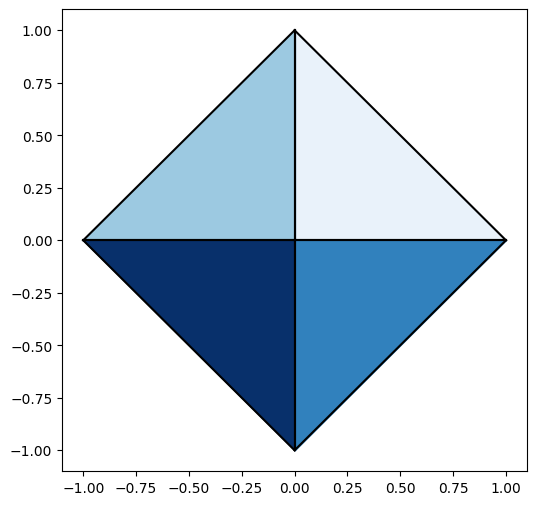

In [16]:
from vectors import *
from draw2d import *

blues = plt.get_cmap('Blues')

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

render(octahedron, color_map=plt.get_cmap('Blues'), lines=black)

In [17]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

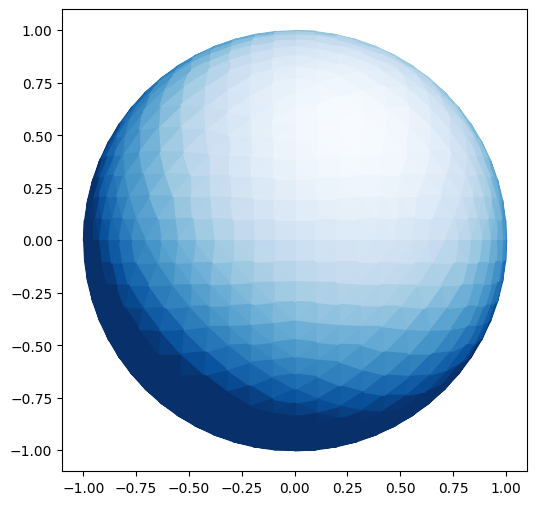

In [18]:
render(sphere_approx(4), lines=None)

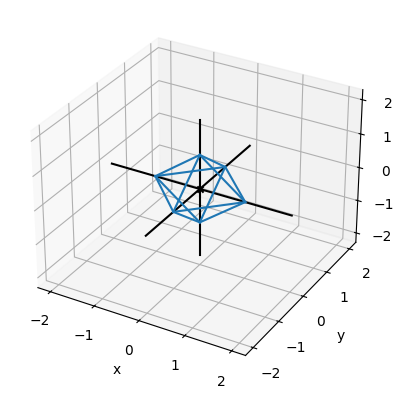

In [19]:
top = (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
            [Segment3D(bottom, p) for p in xy_plane] +\
            [Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)] 
draw3d(*edges)